In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from neural_exploration import *
sns.set()

Using TensorFlow backend.
/home/sauxpa/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/sauxpa/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/sauxpa/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/sauxpa/anaconda3/lib/python3.7/site-packages/tenso

### MDP settings

In [2]:
H = 6
n_states = 5
n_actions = 2
n_features = 16

noise_std = 0.0

n_episodes = int(1e4)
n_sim = 1

### LinUCB-VI on a Linear MDP

In [3]:
a = np.random.randn(n_features)
a /= np.linalg.norm(a, ord=2)
reward_func = lambda x: np.dot(x, a)

mdp = MDPFeatures(H,
                  n_states=n_states,
                  n_actions=n_actions,
                  n_features=n_features,
                  reward_func=reward_func,
                  noise_std=noise_std,
                 )

# to check that backward induction works
mdp.sanity_policy()

In [4]:
regrets = np.empty((n_sim, n_episodes))

for i in range(n_sim):
    mdp.reset_rewards()
    model = LinUCBVI(mdp,
                     n_episodes=n_episodes,
                     init_state=0,
                     reg_factor=1,
                     confidence_scaling_factor=1,
                    )
    model.run()
    regrets[i] = np.cumsum(model.regrets)

100%|██████████| 10000/10000 [00:13<00:00, 723.11it/s, total regret=50.3]


### Sublinear regret growth : exploration is efficient, the optimal policy is closely approximated.

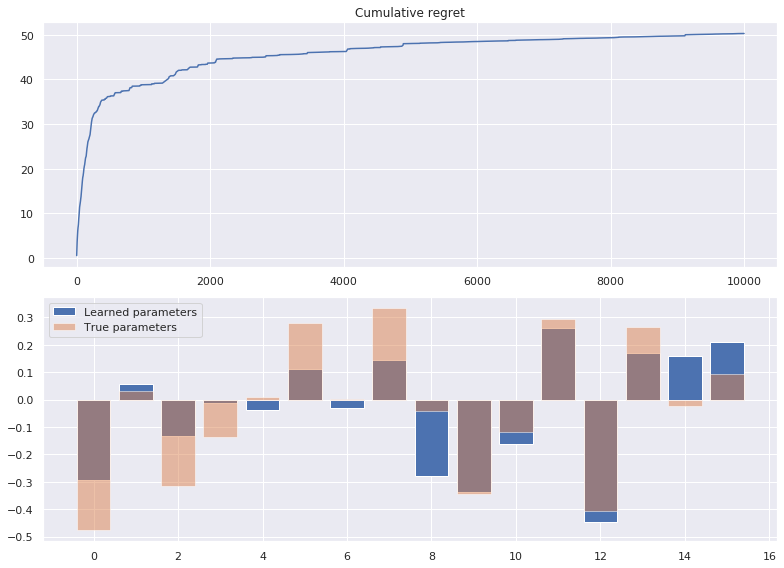

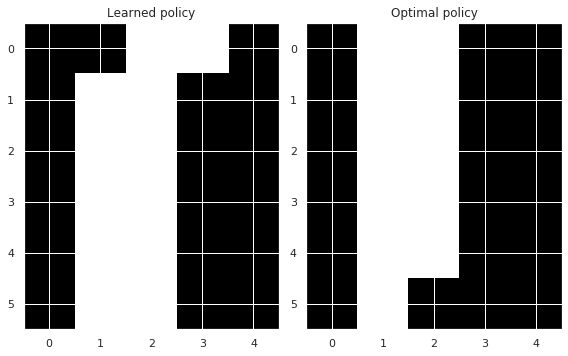

In [5]:
fig, axes = plt.subplots(figsize=(11, 8), nrows=2, ncols=1)

ax = axes[0]
t = np.arange(n_episodes)
mean_regrets = np.mean(regrets, axis=0)
std_regrets = np.std(regrets, axis=0) / np.sqrt(regrets.shape[0])
ax.plot(mean_regrets)
ax.fill_between(t, mean_regrets - 2*std_regrets, mean_regrets + 2*std_regrets, alpha=0.15)
ax.set_title('Cumulative regret')

ax = axes[1]
index = range(mdp.n_features)
ax.bar(index, model.theta[-1], label='Learned parameters')
ax.bar(index, a, label='True parameters', alpha=0.5)
ax.legend()

plt.tight_layout()
plt.show()

fig, axes = plt.subplots(figsize=(8, 8), nrows=1, ncols=2)

ax = axes[0]
ax.imshow(model.policy, cmap='gray', vmin=0, vmax=mdp.n_actions-1)
ax.set_title('Learned policy')

ax = axes[1]
ax.imshow(model.pi_star, cmap='gray', vmin=0, vmax=mdp.n_actions-1)
ax.set_title('Optimal policy')

plt.tight_layout()
plt.show()

### LinUCB-VI on a Linear transition/quadratic reward MDP

In [6]:
a = np.random.randn(n_features)
a /= np.linalg.norm(a, ord=2)
reward_func = lambda x: np.dot(x, a)**2

mdp = MDPFeatures(H,
                  n_states=n_states,
                  n_actions=n_actions,
                  n_features=n_features,
                  reward_func=reward_func,
                  noise_std=noise_std,
                 )

# to check that backward induction works
mdp.sanity_policy()

In [8]:
regrets = np.empty((n_sim, n_episodes))

for i in range(n_sim):
    mdp.reset_rewards()
    model = LinUCBVI(mdp,
                     n_episodes=n_episodes,
                     init_state=0,
                     reg_factor=1,
                     confidence_scaling_factor=1,
                    )
    model.run()
    regrets[i] = np.cumsum(model.regrets)

100%|██████████| 10000/10000 [00:13<00:00, 756.17it/s, total regret=92.3]


### Still sublinear growth : linear predictors yield a close enough approximation of the rewards so that the optimal policy is chosen most of the time.

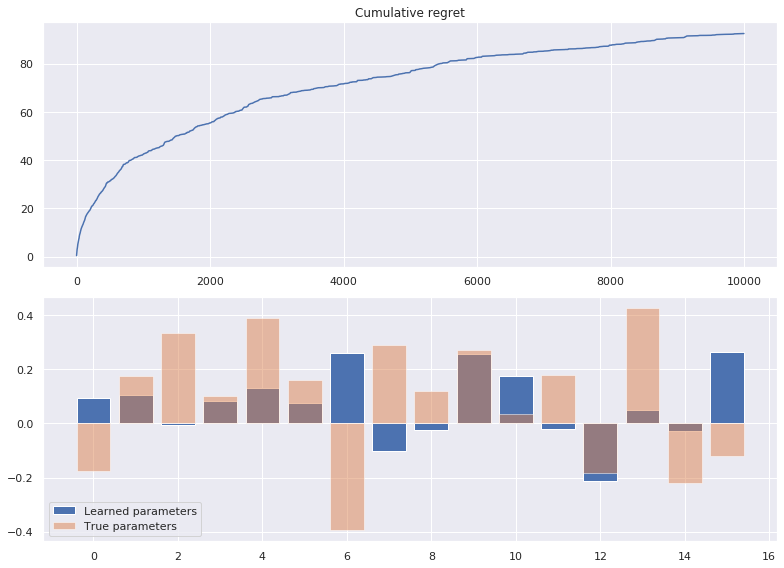

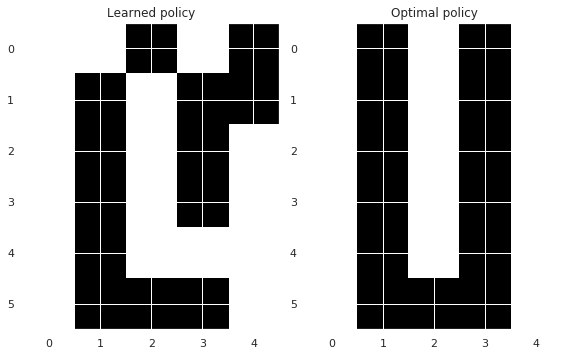

In [9]:
fig, axes = plt.subplots(figsize=(11, 8), nrows=2, ncols=1)

ax = axes[0]
t = np.arange(n_episodes)
mean_regrets = np.mean(regrets, axis=0)
std_regrets = np.std(regrets, axis=0) / np.sqrt(regrets.shape[0])
ax.plot(mean_regrets)
ax.fill_between(t, mean_regrets - 2*std_regrets, mean_regrets + 2*std_regrets, alpha=0.15)
ax.set_title('Cumulative regret')

ax = axes[1]
index = range(mdp.n_features)
ax.bar(index, model.theta[-1], label='Learned parameters')
ax.bar(index, a, label='True parameters', alpha=0.5)
ax.legend()

plt.tight_layout()
plt.show()

fig, axes = plt.subplots(figsize=(8, 8), nrows=1, ncols=2)

ax = axes[0]
ax.imshow(model.policy, cmap='gray', vmin=0, vmax=mdp.n_actions-1)
ax.set_title('Learned policy')

ax = axes[1]
ax.imshow(model.pi_star, cmap='gray', vmin=0, vmax=mdp.n_actions-1)
ax.set_title('Optimal policy')

plt.tight_layout()
plt.show()

### LinUCB-VI on a Linear transition/nonlinear reward MDP

In [10]:
a = np.random.randn(n_features)
a /= np.linalg.norm(a, ord=2)
reward_func = lambda x: np.cos(10*np.pi*np.dot(x, a))

mdp = MDPFeatures(H,
                  n_states=n_states,
                  n_actions=n_actions,
                  n_features=n_features,
                  reward_func=reward_func,
                  noise_std=noise_std,
                 )

# to check that backward induction works
mdp.sanity_policy()

In [12]:
regrets = np.empty((n_sim, n_episodes))

for i in range(n_sim):
    mdp.reset_rewards()
    model = LinUCBVI(mdp,
                     n_episodes=n_episodes,
                     init_state=0,
                     reg_factor=1,
                     confidence_scaling_factor=1,
                    )
    model.run()
    regrets[i] = np.cumsum(model.regrets)

100%|██████████| 10000/10000 [00:14<00:00, 712.23it/s, total regret=2.64e+3]


### Linear regret growth, reward is now "too nonlinear" for LinUCB-VI to be relevant.

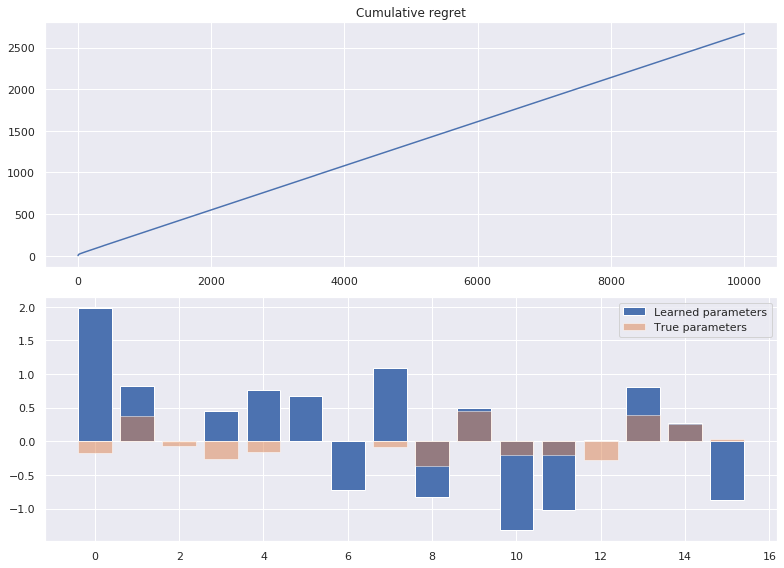

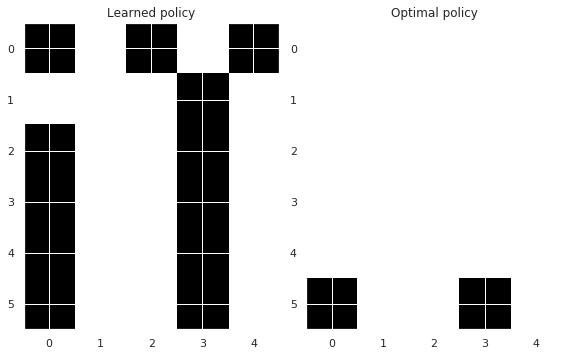

In [13]:
fig, axes = plt.subplots(figsize=(11, 8), nrows=2, ncols=1)

ax = axes[0]
t = np.arange(n_episodes)
mean_regrets = np.mean(regrets, axis=0)
std_regrets = np.std(regrets, axis=0) / np.sqrt(regrets.shape[0])
ax.plot(mean_regrets)
ax.fill_between(t, mean_regrets - 2*std_regrets, mean_regrets + 2*std_regrets, alpha=0.15)
ax.set_title('Cumulative regret')

ax = axes[1]
index = range(mdp.n_features)
ax.bar(index, model.theta[-1], label='Learned parameters')
ax.bar(index, a, label='True parameters', alpha=0.5)
ax.legend()

plt.tight_layout()
plt.show()

fig, axes = plt.subplots(figsize=(8, 8), nrows=1, ncols=2)

ax = axes[0]
ax.imshow(model.policy, cmap='gray', vmin=0, vmax=mdp.n_actions-1)
ax.set_title('Learned policy')

ax = axes[1]
ax.imshow(model.pi_star, cmap='gray', vmin=0, vmax=mdp.n_actions-1)
ax.set_title('Optimal policy')

plt.tight_layout()
plt.show()